In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported!")

✅ Libraries imported!


In [ ]:
# Loading data
exercise_df = pd.read_csv('../data/megaGymDataset.csv')

print(f"✅ Loaded {exercise_df.shape[0]} exercises")
print("\nColumns:", exercise_df.columns.tolist())
exercise_df.head()

✅ Loaded 2918 exercises

Columns: ['Unnamed: 0', 'Title', 'Desc', 'Type', 'BodyPart', 'Equipment', 'Level', 'Rating', 'RatingDesc']


,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


In [6]:
# This dataset has real gym member profiles — age, weight, goal, calories burned etc.
members_df = pd.read_csv('../data/gym_members_exercise_tracking.csv')

print(f"✅ Loaded {members_df.shape[0]} member profiles")
print("\nColumns:", members_df.columns.tolist())
members_df.head()

✅ Loaded 973 member profiles

Columns: ['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [7]:
print("=== EXERCISE DATASET ===")
print(exercise_df.isnull().sum())

print("\n=== MEMBERS DATASET ===")
print(members_df.isnull().sum())

=== EXERCISE DATASET ===
Unnamed: 0       0
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment       32
Level            0
Rating        1887
RatingDesc    2056
dtype: int64

=== MEMBERS DATASET ===
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


In [11]:
# Drop useless columns
exercise_df.drop(columns=['Unnamed: 0', 'Rating', 'RatingDesc'], inplace=True)

# Fill missing values
exercise_df['Desc'].fillna('No description available', inplace=True)
exercise_df['Equipment'].fillna('Body Only', inplace=True)

# Verify — should show all zeros now
print(exercise_df.isnull().sum())
print(f"\n✅ Exercise dataset clean! {exercise_df.shape[0]} exercises ready")

Title           0
Desc         1550
Type            0
BodyPart        0
Equipment      32
Level           0
dtype: int64

✅ Exercise dataset clean! 2918 exercises ready


In [12]:
# Stronger fix — handles all types of empty/null values
exercise_df['Desc'] = exercise_df['Desc'].fillna('No description available')
exercise_df['Equipment'] = exercise_df['Equipment'].fillna('Body Only')

# Force check
print("Missing values after fix:")
print(exercise_df.isnull().sum())

Missing values after fix:
Title        0
Desc         0
Type         0
BodyPart     0
Equipment    0
Level        0
dtype: int64


In [13]:
print("Basic stats of members:")
members_df.describe()

Basic stats of members:


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [14]:
# What fitness levels exist?
print("Fitness levels:", members_df['Experience_Level'].unique())

# What workout types exist?
print("Workout types:", members_df['Workout_Type'].unique())

Fitness levels: [3 2 1]
Workout types: <StringArray>
['Yoga', 'HIIT', 'Cardio', 'Strength']
Length: 4, dtype: str


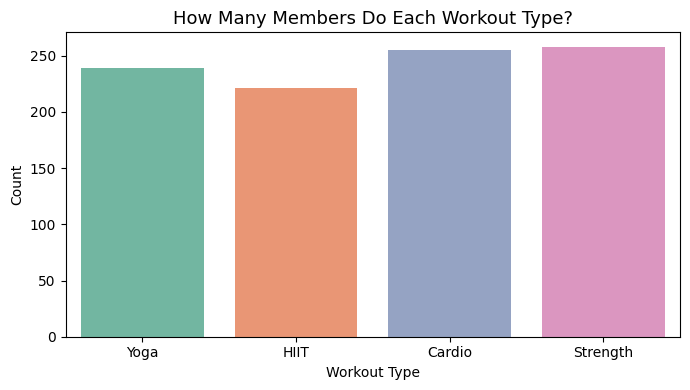

In [15]:
plt.figure(figsize=(7, 4))
sns.countplot(x='Workout_Type', data=members_df, palette='Set2')
plt.title('How Many Members Do Each Workout Type?', fontsize=13)
plt.xlabel('Workout Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

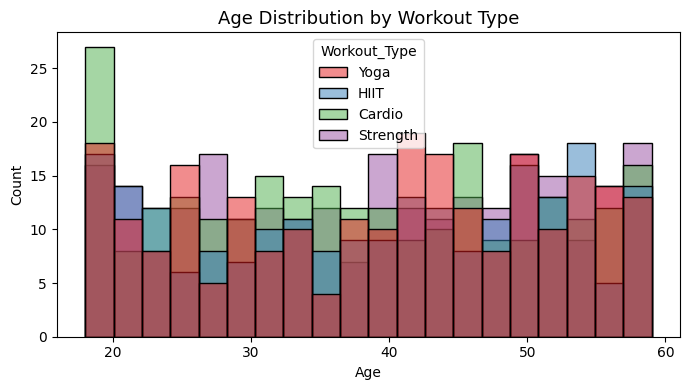

In [16]:
plt.figure(figsize=(7, 4))
sns.histplot(data=members_df, x='Age', hue='Workout_Type', bins=20, palette='Set1')
plt.title('Age Distribution by Workout Type', fontsize=13)
plt.xlabel('Age')
plt.tight_layout()
plt.show()

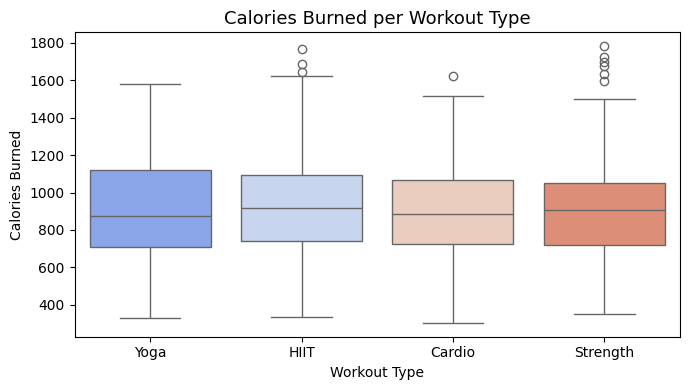

In [17]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='Workout_Type', y='Calories_Burned', data=members_df, palette='coolwarm')
plt.title('Calories Burned per Workout Type', fontsize=13)
plt.xlabel('Workout Type')
plt.ylabel('Calories Burned')
plt.tight_layout()
plt.show()

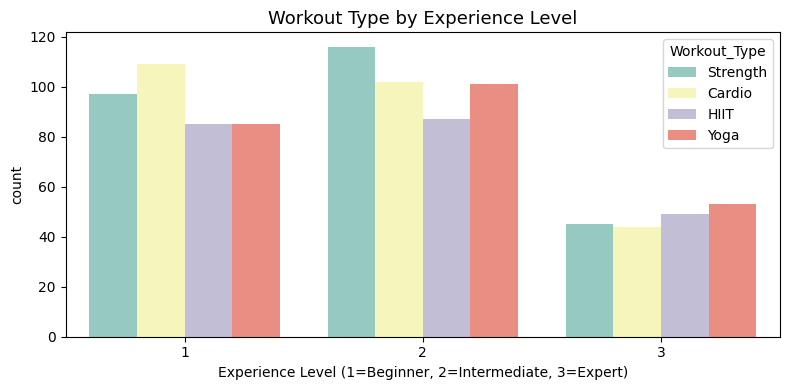

In [18]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Experience_Level', hue='Workout_Type', data=members_df, palette='Set3')
plt.title('Workout Type by Experience Level', fontsize=13)
plt.xlabel('Experience Level (1=Beginner, 2=Intermediate, 3=Expert)')
plt.tight_layout()
plt.show()

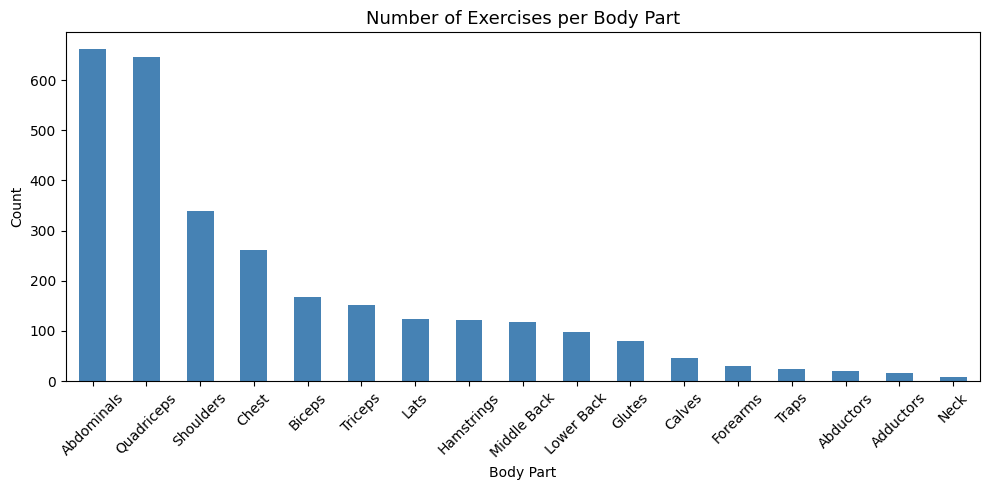

In [19]:
# How many exercises per body part?
plt.figure(figsize=(10, 5))
exercise_df['BodyPart'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Number of Exercises per Body Part', fontsize=13)
plt.xlabel('Body Part')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

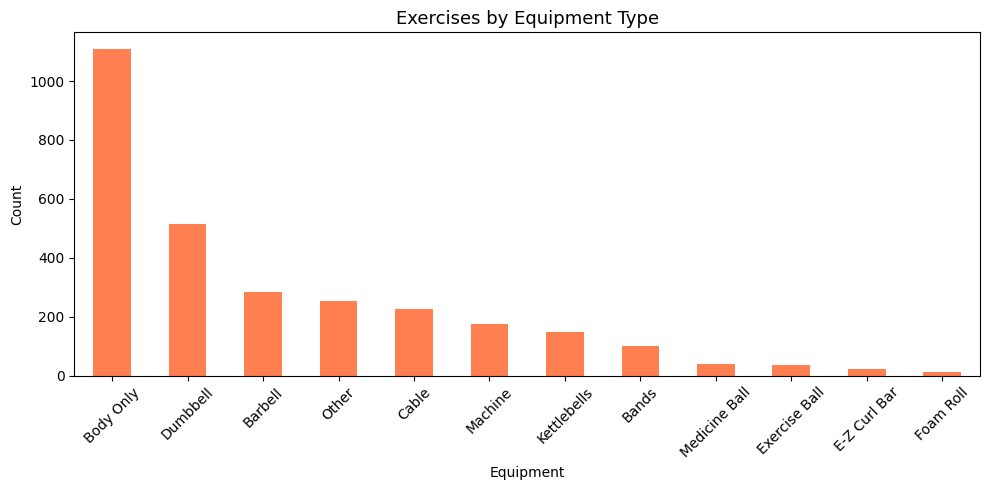

In [20]:
# Equipment distribution
plt.figure(figsize=(10, 5))
exercise_df['Equipment'].value_counts().plot(kind='bar', color='coral')
plt.title('Exercises by Equipment Type', fontsize=13)
plt.xlabel('Equipment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Drop any rows with missing values
members_df.dropna(inplace=True)
exercise_df.dropna(inplace=True)

# Save cleaned versions
members_df.to_csv('../data/gym_members_clean.csv', index=False)
exercise_df.to_csv('../data/exercise_clean.csv', index=False)

print("✅ Clean datasets saved —  Phase 1 completed!")

✅ Clean datasets saved —  Phase 1 completed!
